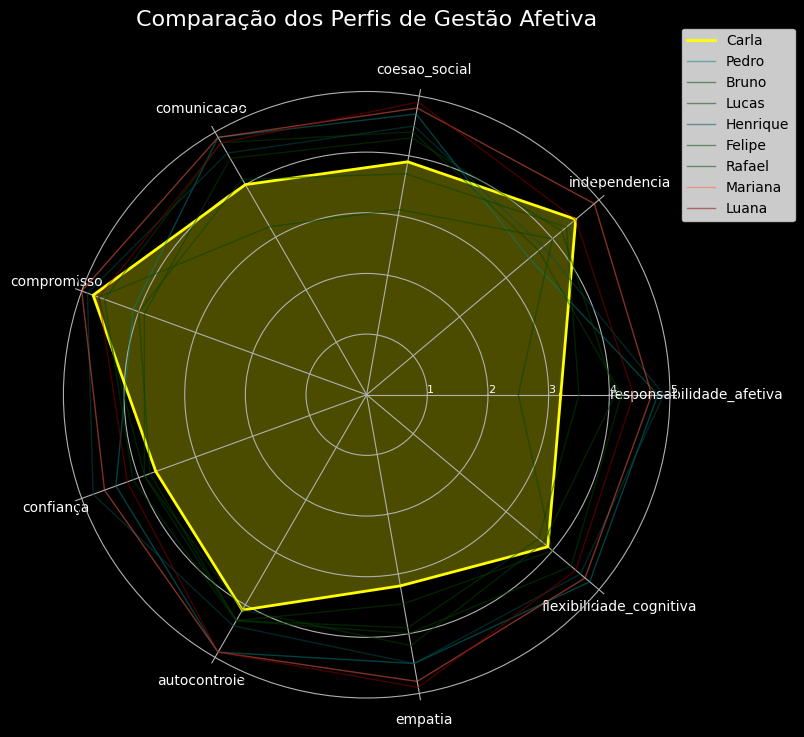

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import io

# Novo conjunto de dados em CSV (exemplo)
data_csv = """participante,tipo_relacionamento,responsabilidade_afetiva,independencia,coesao_social,comunicacao,compromisso,confiança,autocontrole,empatia,flexibilidade_cognitiva
Carla,Relação Aberta com Foco no Casual,3.2,4.5,3.9,4.0,4.8,3.7,4.1,3.2,3.9
Pedro,Poliamor Não-Hierárquico com Alta Interdependência,4.8,3.5,4.7,4.9,4.1,4.4,4.9,4.5,4.8
Bruno,Swing com Foco em Trocas Sexuais,2.5,4.0,3.1,3.2,4.7,3.9,4.3,3.5,4.0
Lucas,Relação Aberta com Envolvimento Emocional Limitado,4.1,4.2,4.3,4.5,3.9,3.9,4.1,4.2,3.8
Henrique,Swing Monogâmico,4.9,3.8,4.5,4.6,4.9,4.8,4.4,4.5,4.6
Felipe,Poliamor Não-Hierárquico com Baixa Interdependência,3.5,4.3,3.7,4.1,4.0,3.8,4.3,3.9,3.7
Rafael,Swing com Amizade e Conexão Social,4.2,3.7,4.4,4.8,4.6,4.1,4.3,4.0,4.4
Mariana,Poliamor Não-Hierárquico com Alta Interdependência,4.7,4.9,4.8,4.9,5.0,4.6,4.9,4.8,4.7
Luana,Swing com Conexões Emocionais,4.4,4.5,4.9,4.8,4.7,4.2,4.9,4.9,4.5
"""

# Carregando os dados
df = pd.read_csv(io.StringIO(data_csv))

# Definindo as novas variáveis para o gráfico
variaveis = ['responsabilidade_afetiva', 'independencia', 'coesao_social', 'comunicacao', 'compromisso', 'confiança', 'autocontrole', 'empatia', 'flexibilidade_cognitiva']
num_variaveis = len(variaveis)

# Função para gerar o gráfico de teia
def grafico_teia(df, participante_destaque):
    valores = df[variaveis].values.tolist()
    angulos = [n / float(num_variaveis) * 2 * pi for n in range(num_variaveis)]
    angulos += angulos[:1]

    plt.figure(figsize=(8, 8), facecolor='black')
    ax = plt.subplot(111, polar=True)
    ax.set_facecolor('black')

    # Cores: verde azulado para os homens, verde escuro para as mulheres exceto a destacada e as em vermelho
    cores_verde_azulado = ['#006666', '#008080', '#007777', '#005757', '#004C4C']
    cores_verde_escuro = ['#004400']
    cores_vermelho = ['#FF6347', '#8B0000']  # Tomate e Vermelho Escuro

    for i, participante in enumerate(df['participante']):
        valores_participante = valores[i]
        valores_participante += valores_participante[:1]

        if participante == participante_destaque:
            ax.plot(angulos, valores_participante, linewidth=2, linestyle='solid', label=participante, color='yellow')
            ax.fill(angulos, valores_participante, color='yellow', alpha=0.3)
        elif participante in ['Mariana', 'Luana']:  # Mulheres em vermelho
            cor_vermelho = cores_vermelho[0] if participante == 'Mariana' else cores_vermelho[1]
            ax.plot(angulos, valores_participante, linewidth=1, linestyle='solid', label=participante, color=cor_vermelho, alpha=0.5)
        elif df.loc[i, 'tipo_relacionamento'] in ['Relação Aberta com Foco no Casual', 'Swing Monogâmico', 'Poliamor Não-Hierárquico com Alta Interdependência']:  # Homens
            cor_homem = cores_verde_azulado[i % len(cores_verde_azulado)]  # Garantir que não ultrapassa o tamanho da lista
            ax.plot(angulos, valores_participante, linewidth=1, linestyle='solid', label=participante, color=cor_homem, alpha=0.5)
        else:  # Mulheres (exceto a destacada e as em vermelho)
            cor_mulher = cores_verde_escuro[(i - 5) % len(cores_verde_escuro)]  # Garantir que não ultrapassa o tamanho da lista
            ax.plot(angulos, valores_participante, linewidth=1, linestyle='solid', label=participante, color=cor_mulher, alpha=0.5)

    plt.xticks(angulos[:-1], variaveis, color='white', size=10)
    ax.tick_params(colors='white')
    ax.yaxis.set_tick_params(labelsize=8)
    ax.set_rlabel_position(0)

    plt.title('Comparação dos Perfis de Gestão Afetiva', size=16, color='white', y=1.08)
    plt.tight_layout()
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()

# Gerando o gráfico com Carla em destaque
grafico_teia(df, 'Carla')